In [1]:
from kerykeion import AstrologicalSubject
from datetime import timedelta, date, datetime
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('OFFICIAL_DF_HOUSE.csv')
df2=pd.read_csv('OFFICIAL_DF_SIGN.csv')

In [3]:
df=df[['Month', 'Day', 'Year','Hour','Minute','Time','Sun House','Mercury House','Venus House','Moon House','Mars House','Jupiter House','Saturn House', 'Uranus House', 'Neptune House']]
df2=df2[['Month', 'Day', 'Year','Hour','Minute','Time','Sun Sign','Mercury Sign','Venus Sign','Moon Sign','Mars Sign','Jupiter Sign','Saturn Sign', 'Uranus Sign', 'Neptune Sign']]

In [4]:
def prob_matrix(p1,p2):
    mutual_info=np.zeros((12,12))
    for i in range (1,13):
        for j in range (1,13):
            adjusted_df=df[(df[p1]==i) & (df[p2]==j)]
            mutual_info[i-1,j-1]=adjusted_df.shape[0]
    prob=mutual_info/np.sum(mutual_info)
    return prob
def prob_matrix2(p1,p2):
    mutual_info=np.zeros((12,12))
    for i in range (1,13):
        for j in range (1,13):
            adjusted_df=df2[(df2[p1]==i) & (df2[p2]==j)]
            mutual_info[i-1,j-1]=adjusted_df.shape[0]
    prob=mutual_info/np.sum(mutual_info)
    return prob

In [5]:
planets=['Sun House','Mercury House','Venus House','Moon House','Mars House','Jupiter House','Saturn House', 'Uranus House', 'Neptune House']
planets2=['Sun Sign','Mercury Sign','Venus Sign','Moon Sign','Mars Sign','Jupiter Sign','Saturn Sign', 'Uranus Sign', 'Neptune Sign']

In [6]:
def mutual_information(matrix):
    m_i = 0.0
    X = matrix.shape[0]
    Y = matrix.shape[1]
    
    for x in range(X):
        for y in range(Y):
            pxy = matrix[x,y]
            px = sum(matrix[x,:])
            py = sum(matrix[:,y])
            
            if (pxy!=0):
                m_i += pxy*np.log2(pxy/(px*py))
    return m_i

In [7]:
mutual_df_house=pd.DataFrame(columns=planets)
mutual_df_sign=pd.DataFrame(columns=planets2)

In [8]:
for p1 in planets:
    new_entry={}
    for p2 in planets:
        prob=prob_matrix(p1,p2)
        mutual_info=mutual_information(prob)
        #new_entry[p2]=mutual_info
        if (p1==p2):
            new_entry[p2]=0.0000
        else:
            new_entry[p2]=mutual_info
    new_entry['base']=p1
    mutual_df_house = pd.concat([mutual_df_house, pd.DataFrame([new_entry])], ignore_index=True)

In [9]:
for p1 in planets2:
    new_entry={}
    for p2 in planets2:
        prob=prob_matrix2(p1,p2)
        mutual_info=mutual_information(prob)
        #new_entry[p2]=mutual_info
        if (p1==p2):
            new_entry[p2]=0.0000
        else:
            new_entry[p2]=mutual_info
    new_entry['base']=p1
    mutual_df_sign = pd.concat([mutual_df_sign, pd.DataFrame([new_entry])], ignore_index=True)

In [10]:
mutual_df_house.index=mutual_df_house['base']
mutual_df_house = mutual_df_house.drop('base', axis=1)
mutual_df_house=mutual_df_house[['Sun House','Mercury House','Venus House','Moon House','Mars House','Jupiter House','Saturn House', 'Uranus House', 'Neptune House']]

In [11]:
mutual_df_sign.index=mutual_df_sign['base']
mutual_df_sign = mutual_df_sign.drop('base', axis=1)

In [14]:
purple_cmap = sns.light_palette("#4B2E83", as_cmap=True)

<AxesSubplot:ylabel='base'>

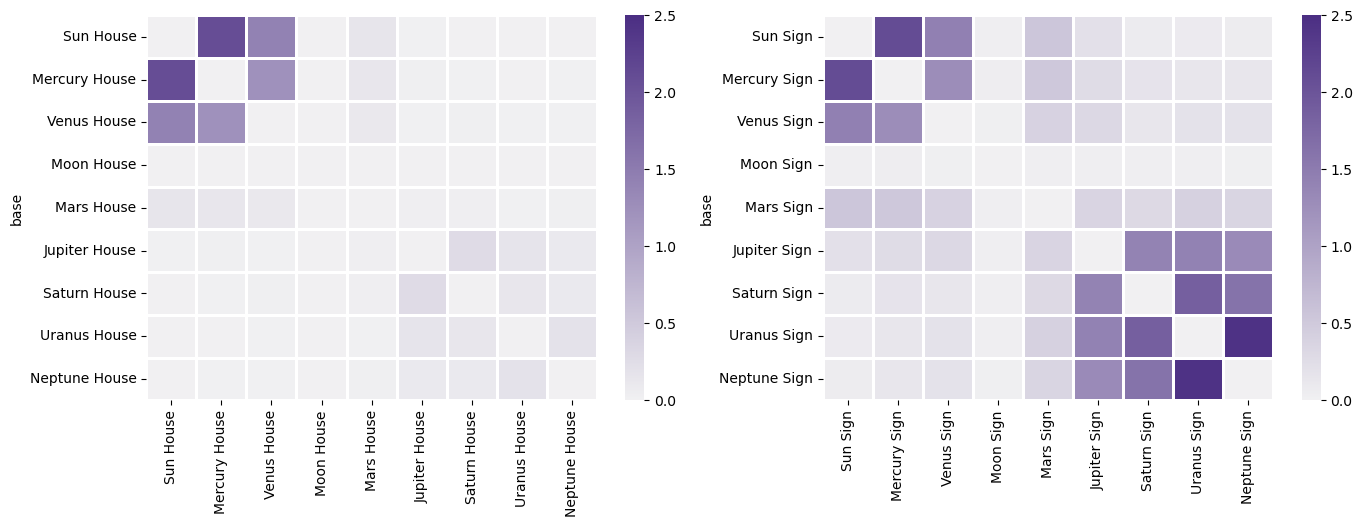

In [15]:
plt.figure(figsize=(16, 5))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.heatmap(mutual_df_house, cmap=purple_cmap, linewidths=1,vmin=0, vmax=2.5)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.heatmap(mutual_df_sign, cmap=purple_cmap, linewidths=1,vmin=0, vmax=2.5)

In [14]:
#mutual_df_sign.to_csv('Sign_MI.csv', index=False)

In [15]:
mutual_df_house.to_csv('HOUSE_MI.csv', index=False)